# Natural Language Processing Continued

## Topic Modeling

NLP is all about unstructured data, and one of the problem industry is facing today is about amount of data that any System has to process. Often its not practical to read through a huge volume of data and get some insights about that data. Consider google news, there are hundred of thousands of news get published on daily basis. So we need a way to group news with some keywords in order to understand what is going on. 

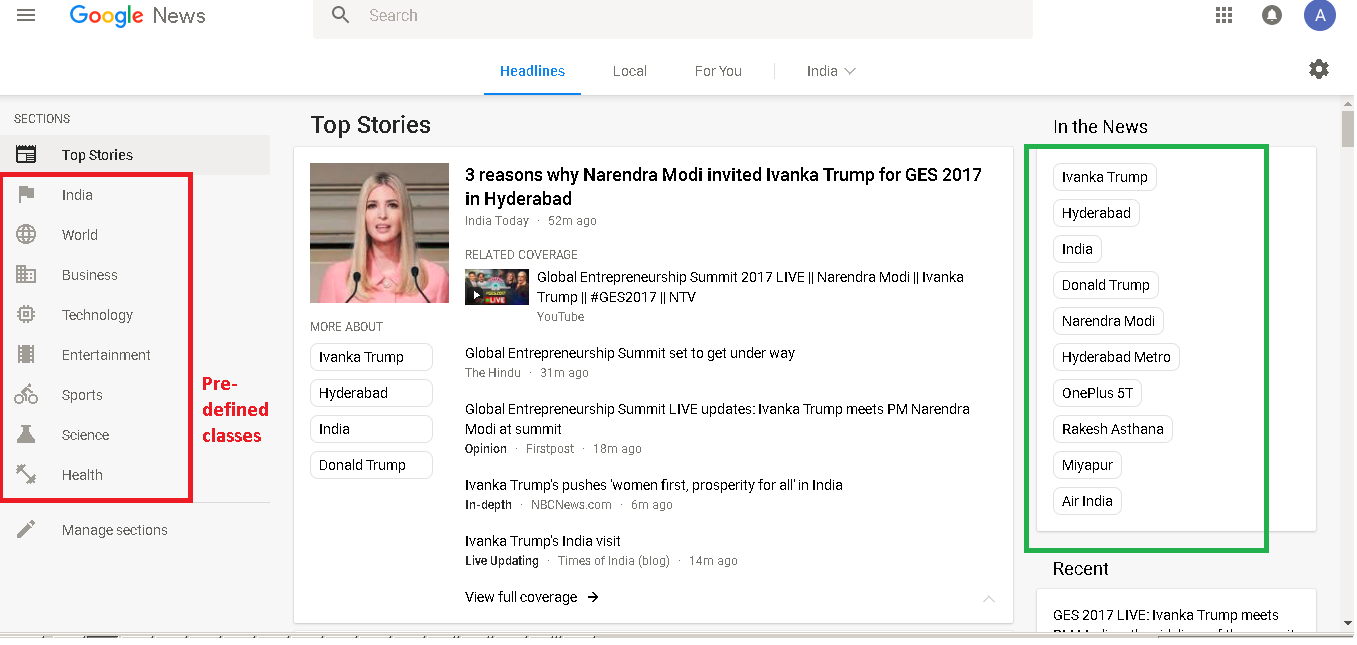

- One in red are classes, which are fixed and with the help of training data, we can build news classifier.
- But one in green are topics, that are identified run time. And process of identification of topics is totally unsupervised. And Topic modelling is one the best way to understand, repersent any unstructured text without actually getting into it.

__Topic Modelling__ as the name suggests, it is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus. Thus, assisting better decision making.

A __Topic__ can be defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model should result in – “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, and “farm”, “crops”, “wheat” for a topic – “Farming”.

### Applications of Topic Modelling

- Document Clustering.
    1. Group news.
    2. Group emails.
    3. Group similar medical notes etc.
- Keywords Generation. Can be used for SEO.
- Build WordCloud.
- Build Search Engines.
- Build knowledge-graph(aka ontologies).



### How Topic Modelling Works

Topics are generally important words in text. 
- Frequency count can be one of the way to identify topics.
- TF-IDF can also be used for Topic Modelling.
- Or most famous, LDA (Latent Dirichlet Allocation)

### LDA

Suppose you have the following set of sentences:

- I like to eat broccoli and bananas.
- I ate a banana and spinach smoothie for breakfast.
- Chinchillas and kittens are cute.
- My sister adopted a kitten yesterday.
- Look at this cute hamster munching on a piece of broccoli.

LDA will try to identify words which have been used in similar context and will calculate probability of occuring two words togther.
In the above example, LDA will create topics like:
    
- Topic A: 30% broccoli, 15% bananas, 10% breakfast, 10% munching, … (at which point, you could interpret topic A to be about food)
- Topic B: 20% chinchillas, 20% kittens, 20% cute, 15% hamster, … (at which point, you could interpret topic B to be about cute animals).



### Topic Modelling with Gensim

gensim(https://radimrehurek.com/gensim/) package in python implements most of topic modelling algorithms.

* We'll walk through a basic application of Topic Modeling with LDA
* We'll also cover the basic NLP operations necessary for the application
    

In [17]:
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

### Let's fast-forward through pre-processing

* After the processing, we'll have *texts* - a tokenized, stopped and stemmed list of words from a single document
* Let’s fast forward and loop through all our documents and appended each one to *texts*
* So now *texts* is a list of lists, one list for each of our original documents

In [22]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from pprint import pprint

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = set(stopwords.words('english'))

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

print("\n##### texts")
print(texts)

print("\n##### The lines in texts")
for line in texts:
    print(line)


##### texts
[['brocolli', 'good', 'eat', 'brother', u'like', 'eat', 'good', 'brocolli', 'mother'], ['mother', u'spend', 'lot', 'time', u'drive', 'brother', 'around', u'basebal', u'practic'], ['health', u'expert', 'suggest', u'drive', 'may', u'caus', u'increas', 'tension', 'blood', u'pressur'], ['often', 'feel', u'pressur', 'perform', 'well', 'school', 'mother', 'never', u'seem', 'drive', 'brother', 'better'], ['health', u'profession', 'say', 'brocolli', 'good', 'health']]

##### The lines in texts
['brocolli', 'good', 'eat', 'brother', u'like', 'eat', 'good', 'brocolli', 'mother']
['mother', u'spend', 'lot', 'time', u'drive', 'brother', 'around', u'basebal', u'practic']
['health', u'expert', 'suggest', u'drive', 'may', u'caus', u'increas', 'tension', 'blood', u'pressur']
['often', 'feel', u'pressur', 'perform', 'well', 'school', 'mother', 'never', u'seem', 'drive', 'brother', 'better']
['health', u'profession', 'say', 'brocolli', 'good', 'health']


## What's next?

* To generate an LDA model, we need to understand how frequently each term occurs within each document
* To do that, we need to construct a document-term matrix with a package called *gensim*

# Topic Modeling with gensim

## Getting started with gensim?




In [24]:
from gensim import corpora, models

dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(32 unique tokens: [u'often', u'feel', u'profession', u'drive', u'say']...)


* The Dictionary() function traverses texts, assigning a unique integer id to each unique token while also collecting word counts and relevant statistics
* To see each token’s unique integer id, try -

In [25]:
print(dictionary.token2id)

{u'often': 23, u'feel': 24, u'profession': 31, u'drive': 8, u'say': 30, u'pressur': 18, u'basebal': 7, u'seem': 29, u'expert': 14, u'perform': 28, u'suggest': 16, u'better': 27, u'health': 19, u'lot': 9, u'tension': 13, u'good': 1, u'around': 6, u'may': 15, u'mother': 4, u'school': 22, u'blood': 20, u'never': 25, u'increas': 21, u'eat': 5, u'practic': 12, u'brocolli': 0, u'like': 2, u'well': 26, u'brother': 3, u'caus': 17, u'time': 10, u'spend': 11}


Next, our dictionary must be converted into a [bag-of-words](https://en.wikipedia.org/wiki/Bag-of-words_model) -

In [27]:
corpus = [dictionary.doc2bow(text) for text in texts]
for line in corpus:
    print(line)

[(0, 2), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2)]
[(3, 1), (4, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]
[(8, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]
[(3, 1), (4, 1), (8, 1), (18, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]
[(0, 1), (1, 1), (19, 2), (30, 1), (31, 1)]


* The doc2bow() function converts dictionary into a bag-of-words
* The result, *corpus*, is a list of vectors equal to the number of documents
* In each document vector is a series of tuples
* The tuples are (term ID, term frequency) pairs
* This includes terms that actually occur - terms that do not occur in a document will not appear in that document’s vector

## A Quick Quiz

Looking at the data above, please answer the following:
* How many times does *basebal* occur in *doc_a*?
* How many times does *basebal* occur in *doc_b*?
* How many times does *health* occur in *doc_e*?
* Give an example of a word that occurs in *doc_a* but doesn't occur in *doc_b*.
* How many times does *brother* occur in all the documents?

## Creating the LDA Model

*corpus* is a (sparse) document-term matrix and now we’re ready to generate an LDA model

In [11]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

## Parameters to the LDA model

https://radimrehurek.com/gensim/models/ldamodel.html
* num_topics
    - required
    - An LDA model requires the user to determine how many topics should be generated
    - Our document set is small, so we’re only asking for three topics
* id2word
    - required
    - The LdaModel class requires our previous dictionary to map ids to strings
* passes
    - optional
    - The number of laps the model will take through corpus
    - The greater the number of passes, the more accurate the model will be
    - A lot of passes can be slow on a very large corpus.

In [12]:
print(ldamodel)

LdaModel(num_terms=32, num_topics=3, decay=0.5, chunksize=2000)


In [13]:
print(ldamodel.print_topics())

[(0, u'0.082*"brocolli" + 0.082*"good" + 0.081*"brother" + 0.081*"mother" + 0.081*"eat" + 0.046*"lot" + 0.046*"time" + 0.046*"basebal" + 0.046*"practic" + 0.046*"around"'), (1, u'0.125*"health" + 0.050*"increas" + 0.050*"may" + 0.050*"blood" + 0.050*"suggest" + 0.050*"caus" + 0.050*"tension" + 0.050*"expert" + 0.050*"say" + 0.050*"profession"'), (2, u'0.059*"drive" + 0.059*"pressur" + 0.059*"perform" + 0.059*"school" + 0.059*"often" + 0.059*"never" + 0.059*"well" + 0.059*"feel" + 0.059*"better" + 0.059*"seem"')]


In [14]:
for topic in ldamodel.print_topics(num_topics=2):
    print(topic)

(0, u'0.082*"brocolli" + 0.082*"good" + 0.081*"brother" + 0.081*"mother" + 0.081*"eat" + 0.046*"lot" + 0.046*"time" + 0.046*"basebal" + 0.046*"practic" + 0.046*"around"')
(2, u'0.059*"drive" + 0.059*"pressur" + 0.059*"perform" + 0.059*"school" + 0.059*"often" + 0.059*"never" + 0.059*"well" + 0.059*"feel" + 0.059*"better" + 0.059*"seem"')


In [15]:
for topic in ldamodel.print_topics(num_topics=3, num_words=3):
    print(topic)

(0, u'0.082*"brocolli" + 0.082*"good" + 0.081*"brother"')
(1, u'0.125*"health" + 0.050*"increas" + 0.050*"may"')
(2, u'0.059*"drive" + 0.059*"pressur" + 0.059*"perform"')


* Within each topic are the three most probable words to appear in that topic

## Topics in detail
Let's now look at a topic in detail. Let us see how distinct the topics are, and if they seem to capture any context.

In [16]:
print(ldamodel.print_topic(topicno=0))

0.082*"brocolli" + 0.082*"good" + 0.081*"brother" + 0.081*"mother" + 0.081*"eat" + 0.046*"lot" + 0.046*"time" + 0.046*"basebal" + 0.046*"practic" + 0.046*"around"


In [17]:
print(ldamodel.print_topic(topicno=1))

0.125*"health" + 0.050*"increas" + 0.050*"may" + 0.050*"blood" + 0.050*"suggest" + 0.050*"caus" + 0.050*"tension" + 0.050*"expert" + 0.050*"say" + 0.050*"profession"


In [18]:
print(ldamodel.print_topic(topicno=2))

0.059*"drive" + 0.059*"pressur" + 0.059*"perform" + 0.059*"school" + 0.059*"often" + 0.059*"never" + 0.059*"well" + 0.059*"feel" + 0.059*"better" + 0.059*"seem"


## Do the topics make sense?

In [19]:
for topic in ldamodel.print_topics(num_topics=3, num_words=3):
    print(topic)

(0, u'0.082*"brocolli" + 0.082*"good" + 0.081*"brother"')
(1, u'0.125*"health" + 0.050*"increas" + 0.050*"may"')
(2, u'0.059*"drive" + 0.059*"pressur" + 0.059*"perform"')


* Even though our document set is small the model is reasonable
* Third Topic - health, brocolli and good make sense together
* Second Topic includes mother and brother, which is reasonable
* First Topic - confusing!
    - If we revisit the original documents, we see that drive has multiple meanings
        * driving a car
        * driving oneself to improve
    - This is something to note
* Two topics seems like a better fit for our documents!

## Refining the model

Two topics seems like a better fit for our documents!

In [20]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

for topic in ldamodel.print_topics(num_topics=2, num_words=4):
    print(topic)

(0, u'0.109*"health" + 0.047*"pressur" + 0.047*"drive" + 0.047*"may"')
(1, u'0.076*"mother" + 0.076*"brother" + 0.055*"brocolli" + 0.055*"good"')


Let's try it with more passes:

In [21]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=200)

for topic in ldamodel.print_topics(num_topics=2, num_words=4):
    print(topic)

(0, u'0.076*"brother" + 0.076*"mother" + 0.055*"brocolli" + 0.055*"good"')
(1, u'0.109*"health" + 0.047*"pressur" + 0.047*"drive" + 0.047*"expert"')


# The Final Topic Modeling Script

In [24]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

# print the topics
for topic in ldamodel.print_topics(num_topics=2, num_words=4):
    print(topic)

(0, u'0.054*"good" + 0.054*"brocolli" + 0.053*"drive" + 0.053*"brother"')
(1, u'0.082*"health" + 0.048*"mother" + 0.048*"brother" + 0.048*"drive"')


## Predicting Topic for new documents

In [35]:
doc_f = "Are Health professionals justified in saying that brocolli is good for your health?" 

doc_set = [doc_f]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

infer = ldamodel[corpus[0]]

# https://radimrehurek.com/gensim/wiki.html

In [16]:
#Lets check by default LDA parameters
print(ldamodel)

LdaModel(num_terms=35, num_topics=3, decay=0.5, chunksize=2000)


## Deep Tree Parsing

One of the advance topic in NLP is Lexical Analysis of text wherein we try to analyze and understand text. This process is called deep tree parsing in NLP world where we try to analyze relationships amongst the text.
- Text parsing is important when you want to know relationships in text. For example <i>Delhi is capital of India<i>, here Delhi and India are related and having a relationship <b>is capital of<b> 

In [46]:
grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)
sent = "the dog saw a man in the park"
tokens=nltk.word_tokenize(sent)
rd_parser = nltk.RecursiveDescentParser(grammar1)
for tree in rd_parser.parse(tokens):
    print(tree)


(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man) (PP (P in) (NP (Det the) (N park))))))
(S
  (NP (Det the) (N dog))
  (VP
    (V saw)
    (NP (Det a) (N man))
    (PP (P in) (NP (Det the) (N park)))))


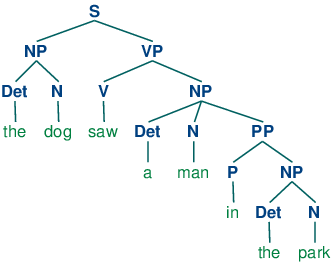 

Here as well we have to define our grammar, which looks quite tedious job. But there are other NLP packages such as Stanford CoreNLP which provides funcitons to generate parse tree from unstructured text without defining any grammar.
- Parse tree provides us meaningful and true relations and also kind of relations they share. Also called facts.
- Tree Parsing is used to build knowledge base from unstructured corpus. Check DbPedia.